<a href="https://colab.research.google.com/github/WetSuiteLeiden/example-notebooks/blob/main/datasets/dataset_intro_by_doing__rechtspraaknl__(stats_example).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# (only) in colab, run this first to install wetsuite from (the most recent) source. 
#    (this should soon simplify to something like   !pip3 install --upgrade wetsuite)
# For your own setup, see wetsuite's install guidelines.
!pip3 install -U wetsuite

# Purpose of this notebook



To show you around the dataset from the

In [1]:
import collections, pprint, datetime

import pandas
import matplotlib.pyplot
import matplotlib.dates as mdates

import wetsuite.datasets
import wetsuite.helpers.format

In [2]:
rs = wetsuite.datasets.load('rechtspraaknl-struc')
print( rs.description )

None


## A little inspection

Not necessary for the dataset, but we'd like to know more about our data

In [3]:
# reminder to self of what's in there
rs.data.random_choice()

('https://data.rechtspraak.nl/uitspraken/content?id=ECLI:NL:PHR:2010:BO1999',
 {'identifier': 'ECLI:NL:PHR:2010:BO1999',
  'issued': '2013-04-05',
  'publisher': 'Raad voor de Rechtspraak',
  'replaces': 'BO1999',
  'date': '2010-12-03',
  'type': 'Conclusie',
  'modified': '2021-07-19T14:44:07',
  'zaaknummer': '09/04361',
  'creator': 'Parket bij de Hoge Raad',
  'subject': 'Bestuursrecht; Belastingrecht',
  'inhoudsindicatie': '81 RO (conform conclusie A-G). Geen toepassing ruilarresten bij aanpassing van de beleggingsportefeuille van een pensioenfonds bij de overgang van opbouwfonds naar uitsluitend uitkeringsfonds.',
  'conclusie': '\nHR nr. 09/04361; \nHof nr. 08/00361; \nRechtbank nr. 07/2690\nDerde Kamer A\nVennootschapsbelasting 2005\n\nProcureur-Generaal bij de Hoge Raad der Nederlanden\n\nMR. P.J. WATTEL\nADVOCAAT-GENERAAL\n\nConclusie van 14 oktober 2010 inzake:\nSTICHTING X (V/H STICHTING A)\nTEGEN\nDE MINISTER VAN FINANCIËN\n\n1. Overzicht\n\n1.1. De belanghebbende, een s

In [3]:
# count how often these dates appear

issueds = collections.Counter()
dates   =  collections.Counter()
for key, value in rs.data.items():
    dates.update( [value['date']] )
    issueds.update( [value['issued']] )

In [4]:
def ymd(s):
    " '2023-02-01' -> (2023, 2, 1) "
    y, m, d = s.split('-')
    return int(y,10), int(m,10), int(d,10)

y_count = collections.defaultdict(int)
y_m_count = collections.defaultdict(int)
# we have already counted data, but per day -- let's do it per month
for k,v in dates.items():
    yr, mo , _ = ymd(k)
    y_count['%s'%(yr)] += v
    y_m_count['%s_%s'%(yr,mo)] += v

# sorted( list(y_count.items()) )  

(7305.0, 19723.0)

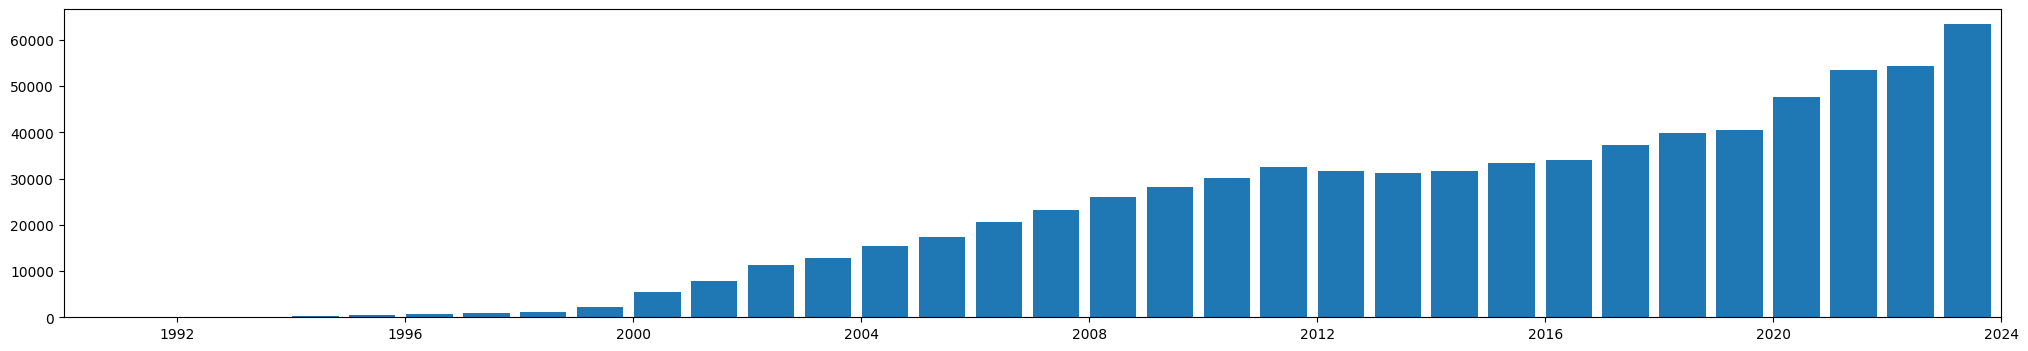

In [5]:
val, weight = [],[]
for y, count in sorted(y_count.items()):
    val.append( datetime.datetime(int(y),6,1) )
    weight.append( count )
#print( val, weight )

fig, ax = matplotlib.pyplot.subplots(1,1, figsize=(25, 4))
ax.bar( val, weight, width=300 )
ax.set_xlim( [datetime.datetime(1990,1,1),datetime.datetime(2024,1,1)] )
#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_rotation(90)  # possibly make that mybasesize-2 or such

(9131.0, 19723.0)

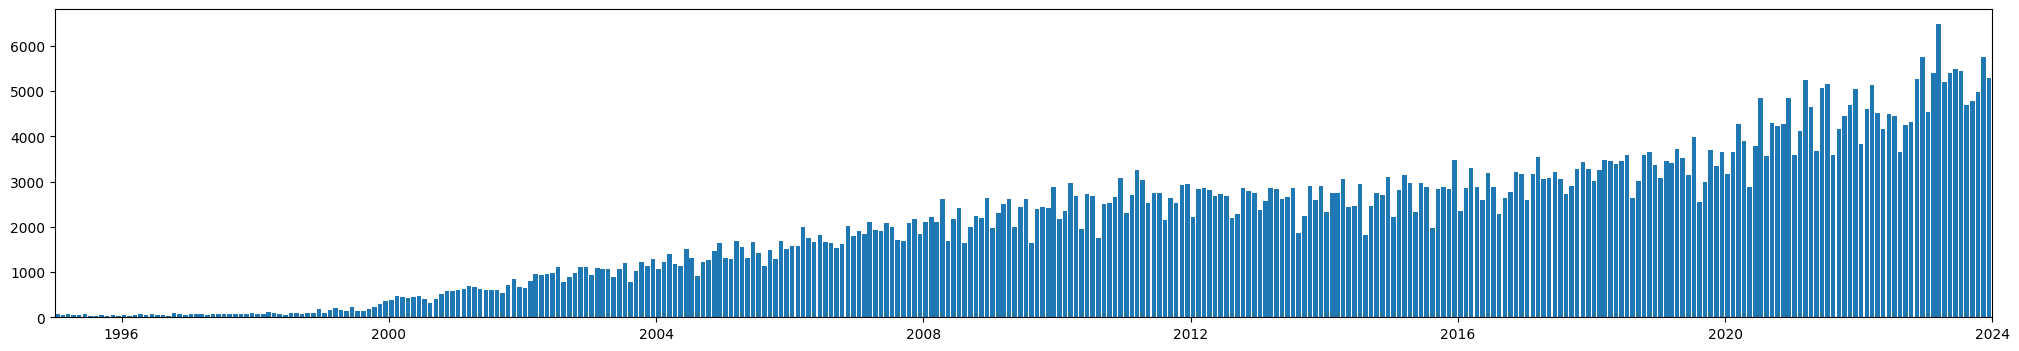

In [6]:
val, weight = [],[]
for y_m, count in y_m_count.items():
    y, m = y_m.split('_')
    val.append( datetime.datetime(int(y),int(m),14)  )
    weight.append( count )

fig, ax = matplotlib.pyplot.subplots(1,1, figsize=(25, 4))
ax.bar( val, weight, width=25 )
ax.set_xlim( [datetime.datetime(1995,1,1),datetime.datetime(2024,1,1)] )

#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_rotation(90)  # possibly make that mybasesize-2 or such


#Actually, something like the following in pandas might have been nicer
#tt = df[ ['dt'] ].groupby( [df["dt"].dt.year,df["dt"].dt.month] ).count().plot(kind="bar", figsize=(22,3), title='Requests per month', stacked=True)


In [7]:
i=0

creators = collections.Counter()
subjects = collections.Counter()
spatials = collections.Counter()

for key, value in rs.data.items():
    creators.update( [value['creator']] )

    if 'subject' in value:
        subjects.update( [value['subject']] )
    else:
        subjects.update( [None] )

    if 'spatial' in value:
        spatials.update( [value['spatial']] )
    else:
        spatials.update( [None] )

    #'creator', 'subject', 'spatial'

    #i += 1
    #if i>10000: 
    #    break
    #print( value )
    #print( value.keys() )


In [8]:
spatials

Counter({None: 352023,
         "'s-Gravenhage": 55719,
         'Den Haag': 28655,
         "'s-Hertogenbosch": 33290,
         'Rotterdam': 29408,
         'Onbekend': 11,
         'Sittard': 4,
         'Utrecht': 45585,
         'Amsterdam': 58453,
         'Arnhem': 26666,
         'Alkmaar': 6539,
         'Haarlemmermeer': 345,
         'Haarlem': 15133,
         'Leeuwarden': 16114,
         'Zwolle': 7642,
         'Nijmegen': 284,
         'Almelo': 5036,
         'Assen': 2044,
         'Harderwijk': 4,
         'Apeldoorn': 164,
         'Hoorn': 45,
         'Delft ': 2,
         'Zaanstad': 793,
         'Amersfoort': 648,
         'Zutphen': 4081,
         'Lelystad': 2779,
         'Groningen': 8685,
         'Leiden': 136,
         'Breda': 12425,
         'Helmond': 2,
         'Hilversum': 1,
         'Tiel': 2,
         'Roermond': 5212,
         'Bergen op Zoom': 532,
         'Middelburg': 9865,
         'Tilburg': 650,
         'Gouda': 147,
         'Maastricht'

In [9]:
subjects

Counter({'Bestuursrecht': 151222,
         'Bestuursrecht; Socialezekerheidsrecht': 58373,
         'Civiel recht': 153396,
         'Bestuursrecht; Ambtenarenrecht': 8997,
         'Civiel recht; Personen- en familierecht': 38579,
         'Bestuursrecht; Bestuursstrafrecht': 2257,
         'Bestuursrecht; Belastingrecht': 71758,
         'Bestuursrecht; Omgevingsrecht': 14773,
         'Bestuursrecht; Bestuursprocesrecht': 3406,
         'Internationaal publiekrecht': 388,
         'Bestuursrecht; Vreemdelingenrecht': 49245,
         'Strafrecht': 142745,
         'Civiel recht; Insolventierecht': 5382,
         'Civiel recht; Ondernemingsrecht': 2551,
         'Strafrecht; Strafprocesrecht': 1205,
         'Civiel recht; Internationaal privaatrecht': 415,
         'Strafrecht; Materieel strafrecht': 1801,
         'Civiel recht; Arbeidsrecht': 7847,
         'Civiel recht; Burgerlijk procesrecht': 3866,
         'Civiel recht; Verbintenissenrecht': 16132,
         'Strafrecht; Inter

In [10]:
creators

Counter({'College van Beroep voor het bedrijfsleven': 13797,
         'Centrale Grondkamer': 11,
         'Centrale Raad van Beroep': 82195,
         'Gerechtshof Amsterdam': 38728,
         'Gerechtshof Arnhem-Leeuwarden': 28777,
         'Gerechtshof Arnhem': 9147,
         'Gerechtshof Den Haag': 13952,
         'Gerechtshof Leeuwarden': 7865,
         "Gerechtshof 's-Gravenhage": 10119,
         "Gerechtshof 's-Hertogenbosch": 30987,
         'Hoge Raad': 44608,
         'Kantongerecht Almelo': 3,
         'Kantongerecht Amersfoort': 3,
         'Kantongerecht Amsterdam': 2,
         'Kantongerecht Beetsterzwaag': 1,
         'Kantongerecht Bergen op Zoom': 6,
         'Kantongerecht Emmen': 4,
         'Kantongerecht Haarlem': 8,
         'Kantongerecht Harderwijk': 3,
         'Kantongerecht Heerlen': 3,
         'Kantongerecht Hoorn': 1,
         'Kantongerecht Heerenveen': 4,
         'Kantongerecht Leeuwarden': 7,
         'Kantongerecht Lelystad': 2,
         'Kantongerecht M

In [11]:
import pandas
pandas.DataFrame( data   for key, data in rs.data.random_sample(10000) )

,identifier,issued,publisher,date,type,modified,zaaknummer,creator,subject,spatial,inhoudsindicatie,uitspraak,replaces,conclusie
0,ECLI:NL:RBOVE:2021:2180,2021-06-01,Raad voor de Rechtspraak,2021-06-01,Uitspraak,2021-06-17T14:15:27,8928668 \ CV EXPL 20-5945,Rechtbank Overijssel,Civiel recht,Enschede,Overeenkomst van opdracht. Tekortkoming in de ...,\n\n1\nDe procedure\n\n1.1.\nHet verloop van d...,NaN,NaN
1,ECLI:NL:GHDHA:2016:30,2016-01-12,Raad voor de Rechtspraak,2016-01-06,Uitspraak,2020-12-21T09:40:04,BK-15/00227,Gerechtshof Den Haag,Bestuursrecht; Belastingrecht,'s-Gravenhage,Tussen partijen is in geschil of belanghebbend...,\n\nGERECHTSHOF DEN HAAG\n\nTeam Belastingrech...,NaN,NaN
2,ECLI:NL:RBROT:2020:5510,2020-06-23,Raad voor de Rechtspraak,2020-06-16,Uitspraak,2020-06-23T14:37:41,10/996509-17,Rechtbank Rotterdam,Strafrecht,Rotterdam,\nZorgverzekeringsfraude door een zorgverlener...,\n\n1.\nOnderzoek op de terechtzitting\nGelet ...,NaN,NaN
3,ECLI:NL:RVS:2002:AE5739,2013-04-04,Raad voor de Rechtspraak,2002-07-24,Uitspraak,2015-11-10T14:57:31,200105897/1,Raad van State,Bestuursrecht,NaN,-,\n200105897/1.\nDatum uitspraak: 24 juli 2002\...,AE5739,NaN
4,ECLI:NL:HR:2014:754,2014-03-27,Raad voor de Rechtspraak,2014-03-28,Uitspraak,2014-07-16T04:06:47,13/03993,Hoge Raad,Bestuursrecht; Belastingrecht,NaN,HR verklaart het beroep in cassatie n-o met to...,\n\n1\nBeoordeling van de ontvankelijkheid van...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ECLI:NL:RBROT:2007:BB8307,2013-04-05,Raad voor de Rechtspraak,2007-11-20,Uitspraak,2015-11-12T11:18:12,10/700098-07,Rechtbank Rotterdam,Strafrecht,NaN,\nrappersdoodslag te Hoogvliet.\nBeroep op noo...,\nRECHTBANK ROTTERDAM\nSector strafrecht\n\nPa...,BB8307,NaN
9996,ECLI:NL:RBNHO:2021:556,2021-01-25,Raad voor de Rechtspraak,2021-01-20,Uitspraak,2021-02-15T09:01:24,8721541,Rechtbank Noord-Holland,Civiel recht,Alkmaar,"overeenkomst van opdracht, redelijk loon, deel...",\n\n1\nHet procesverloop\n\n1.1.\n\n [e...,NaN,NaN
9997,ECLI:NL:RBSGR:2011:BQ6229,2013-04-05,Raad voor de Rechtspraak,2011-05-26,Uitspraak,2013-04-05T08:15:43,AWB 10/20921,Rechtbank 's-Gravenhage,Bestuursrecht; Vreemdelingenrecht,NaN,\nNu uit het onder 3.4 overwogene blijkt dat d...,RECHTBANK ’S GRAVENHAGE\n\nSector Bestuursrech...,BQ6229,NaN
9998,ECLI:NL:GHLEE:2002:AE5522,2013-04-04,Raad voor de Rechtspraak,2002-06-12,Uitspraak,2015-11-10T21:56:00,WAHV 01-00621,Gerechtshof Leeuwarden,Bestuursrecht,Leeuwarden,-,\nWAHV 01/00621\n12 juni 2002\nCJIB 37056355\n...,AE5522,NaN
